In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Assuming you have a CSV file with the data, replace 'your_csv_file.csv' with your actual CSV file name.
csv_filename = 'ScanCenHBURSTorNOBURSTfullcsvWriting.csv'
df = pd.read_csv(csv_filename)
df.columns.values.tolist()

['Time Steps',
 ' Polymerase Count',
 ' Burst Size',
 ' Burst Frequency',
 ' Poly Proba movement',
 ' Count A']

In [2]:
# Calculate mean and std for every 1000 rows
means = []
stds = []

for i in range(0, len(df), 1000):
    subset = df.iloc[i:i+1000]
    mean_A = subset[' Count A'].mean()
    std_A = subset[' Count A'].std()
    means.append(mean_A)
    stds.append(std_A)



In [3]:
means = np.array(means).repeat(1000)
stds = np.array(stds).repeat(1000)

In [4]:
df['Mean A'] = means
df['Std A'] = stds
df.head()

,Time Steps,Polymerase Count,Burst Size,Burst Frequency,Poly Proba movement,Count A,Mean A,Std A
0,1,1,1,0.0,0.0001,4,0.415,0.717837
1,101,1,1,0.0,0.0001,4,0.415,0.717837
2,201,1,1,0.0,0.0001,3,0.415,0.717837
3,301,1,1,0.0,0.0001,3,0.415,0.717837
4,401,1,1,0.0,0.0001,3,0.415,0.717837


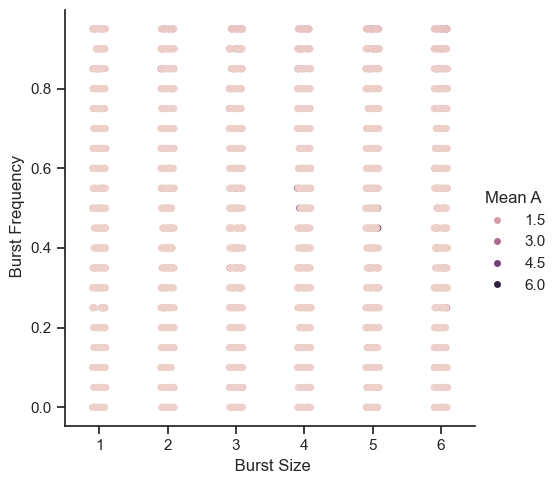

In [15]:
sns.catplot(data = newdf, x = " Burst Size",y=" Burst Frequency",hue = "Mean A", errorbar = "Std A")

In [6]:
df.drop(" Count A",axis = 1)


,Time Steps,Polymerase Count,Burst Size,Burst Frequency,Poly Proba movement,Mean A,Std A
0,1,1,1,0.00,0.0001,0.415,0.717837
1,101,1,1,0.00,0.0001,0.415,0.717837
2,201,1,1,0.00,0.0001,0.415,0.717837
3,301,1,1,0.00,0.0001,0.415,0.717837
4,401,1,1,0.00,0.0001,0.415,0.717837
...,...,...,...,...,...,...,...
2519995,99501,0,6,0.95,1.0001,0.385,1.144589
2519996,99601,0,6,0.95,1.0001,0.385,1.144589
2519997,99701,0,6,0.95,1.0001,0.385,1.144589
2519998,99801,0,6,0.95,1.0001,0.385,1.144589


In [5]:
newdf = df.drop(" Count A",axis = 1)
newdf = newdf.drop("Time Steps",axis = 1)
newdf = newdf.drop(" Polymerase Count",axis = 1)
newdf = newdf.drop_duplicates()
newdf

,Burst Size,Burst Frequency,Poly Proba movement,Mean A,Std A
0,1,0.00,0.0001,0.415,0.717837
1000,1,0.00,0.0501,0.074,0.355880
2000,1,0.00,0.1001,0.071,0.328736
3000,1,0.00,0.1501,0.028,0.165055
4000,1,0.00,0.2001,0.055,0.264660
...,...,...,...,...,...
2515000,6,0.95,0.8001,0.406,1.188519
2516000,6,0.95,0.8501,0.391,1.132874
2517000,6,0.95,0.9001,0.434,1.207104
2518000,6,0.95,0.9501,0.397,1.174210


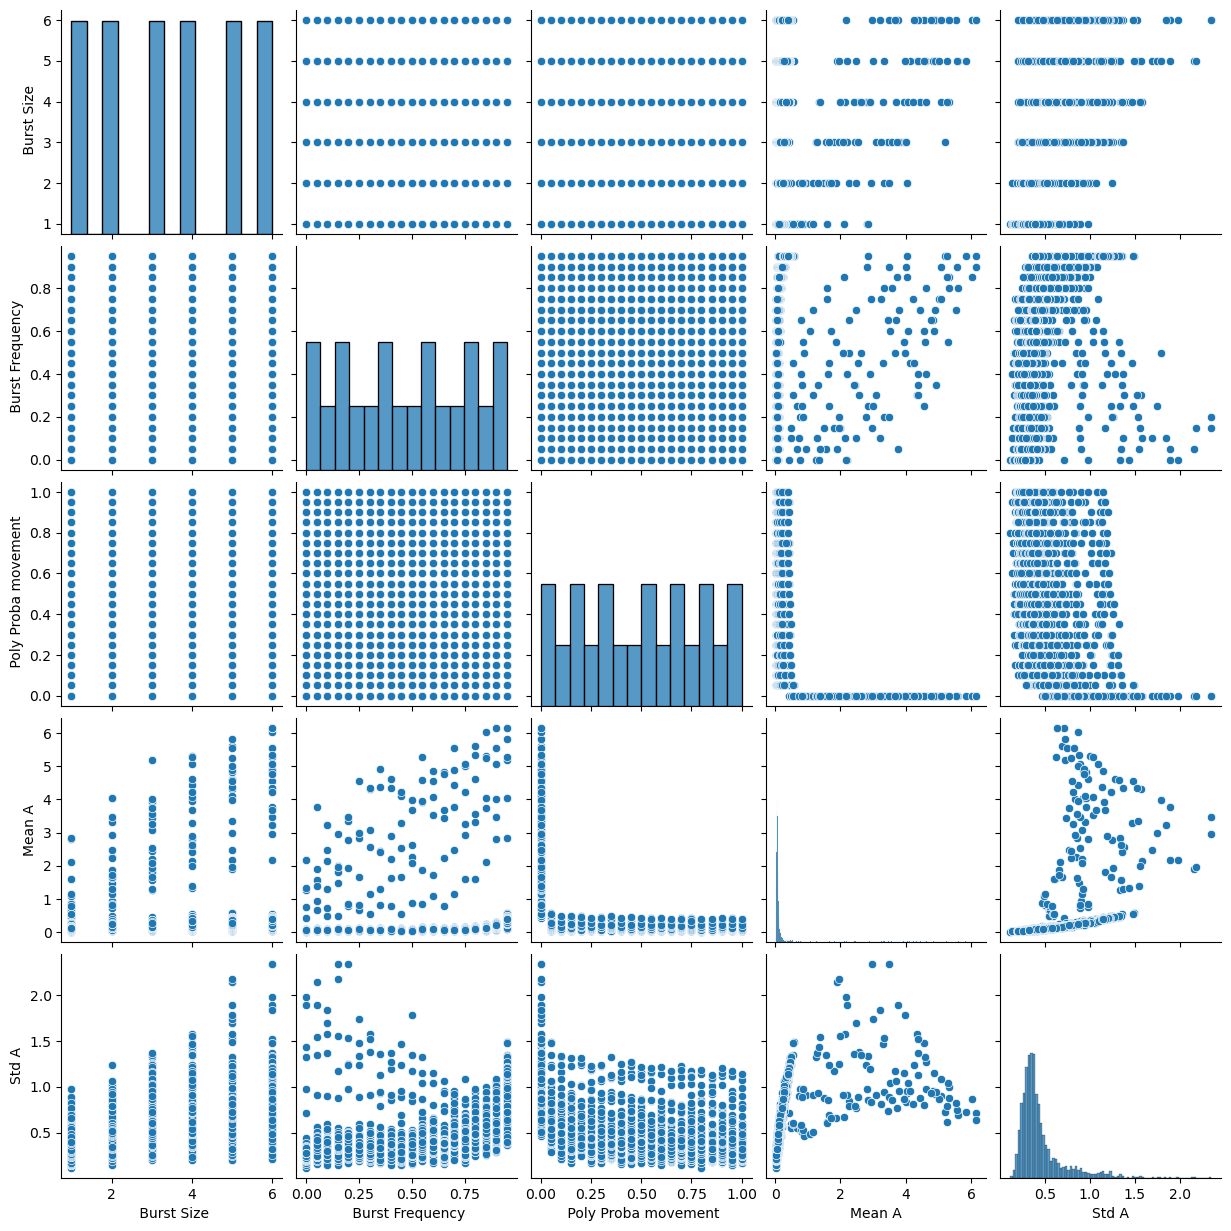

In [6]:
sns.pairplot(data = newdf)


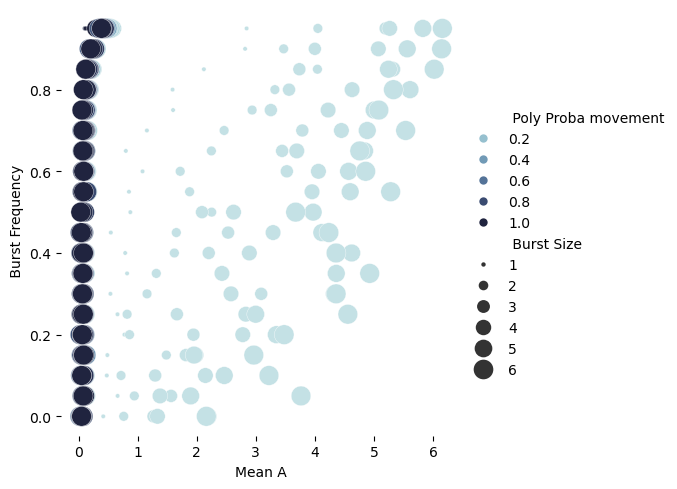

In [7]:

cmap = sns.cubehelix_palette(rot=-.2, as_cmap=True)
g = sns.relplot(
    data=newdf,
    x="Mean A", y=" Burst Frequency",
    hue=" Poly Proba movement", size=" Burst Size",
    palette=cmap, sizes=(10, 200),
)
g.ax.xaxis.grid(True, "minor", linewidth=.25)
g.ax.yaxis.grid(True, "minor", linewidth=.25)
g.despine(left=True, bottom=True)



/var/folders/jg/gqqb9c4s6qd3ftqhm6____m80000gn/T/ipykernel_55527/4081178784.py:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  g = sns.relplot(data=newdf,


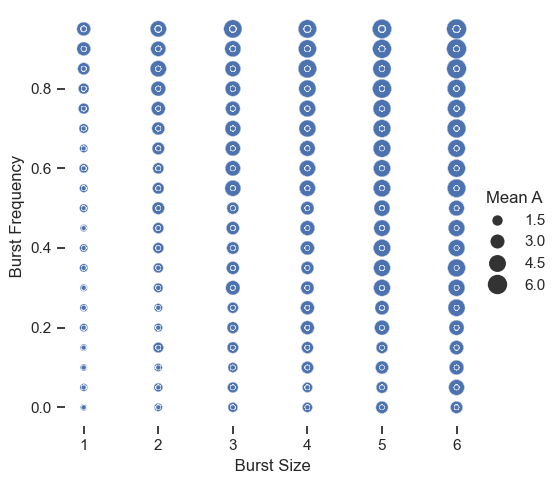

In [13]:

cmap = sns.cubehelix_palette(rot=-.2, as_cmap=True)
g = sns.relplot(data=newdf,
    x=" Burst Size", y=" Burst Frequency",
     size="Mean A",
    palette=cmap, sizes=(10, 200),)
g.ax.xaxis.grid(True, "minor", linewidth=.25)
g.ax.yaxis.grid(True, "minor", linewidth=.25)
g.despine(left=True, bottom=True)


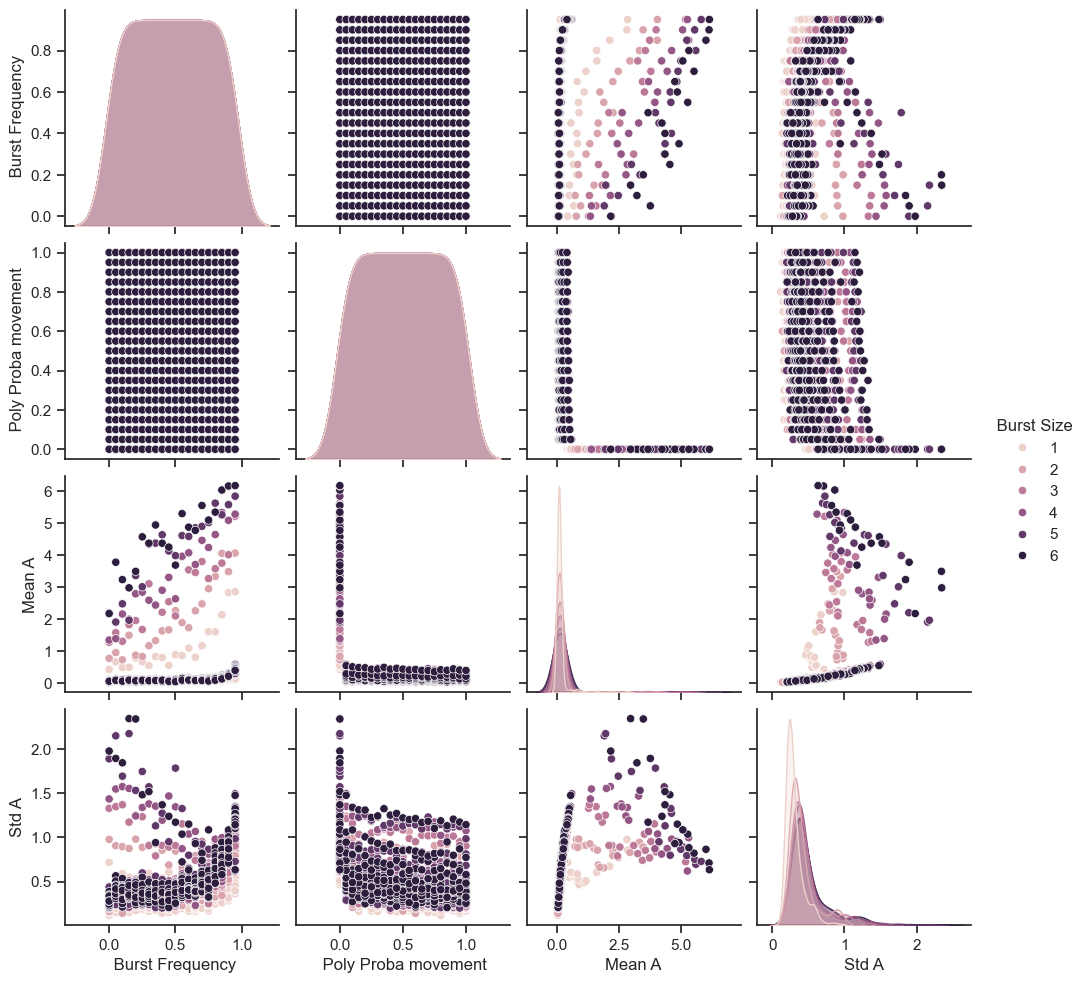

In [8]:
sns.set_theme(style="ticks")
sns.pairplot(newdf, hue=" Burst Size")

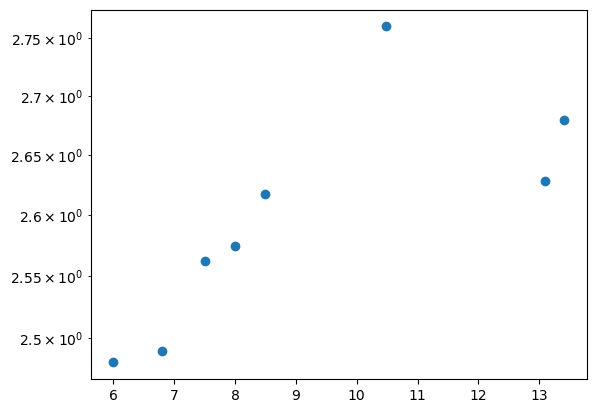

In [22]:
from matplotlib import pyplot as plt
X = [7.5,6,13.41,8.5,8,6.807692308,10.47619048,13.1]
Y = [2.561697533,2.480725379,2.679881942,2.617000341,2.574609941,2.489958479,2.760422483,2.62838893]
plt.yscale("log")
plt.scatter(X,Y)

<Axes: >

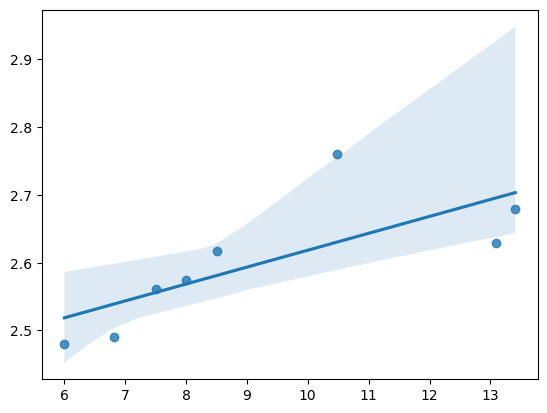

In [31]:
sns.regplot(x =X, y=Y)

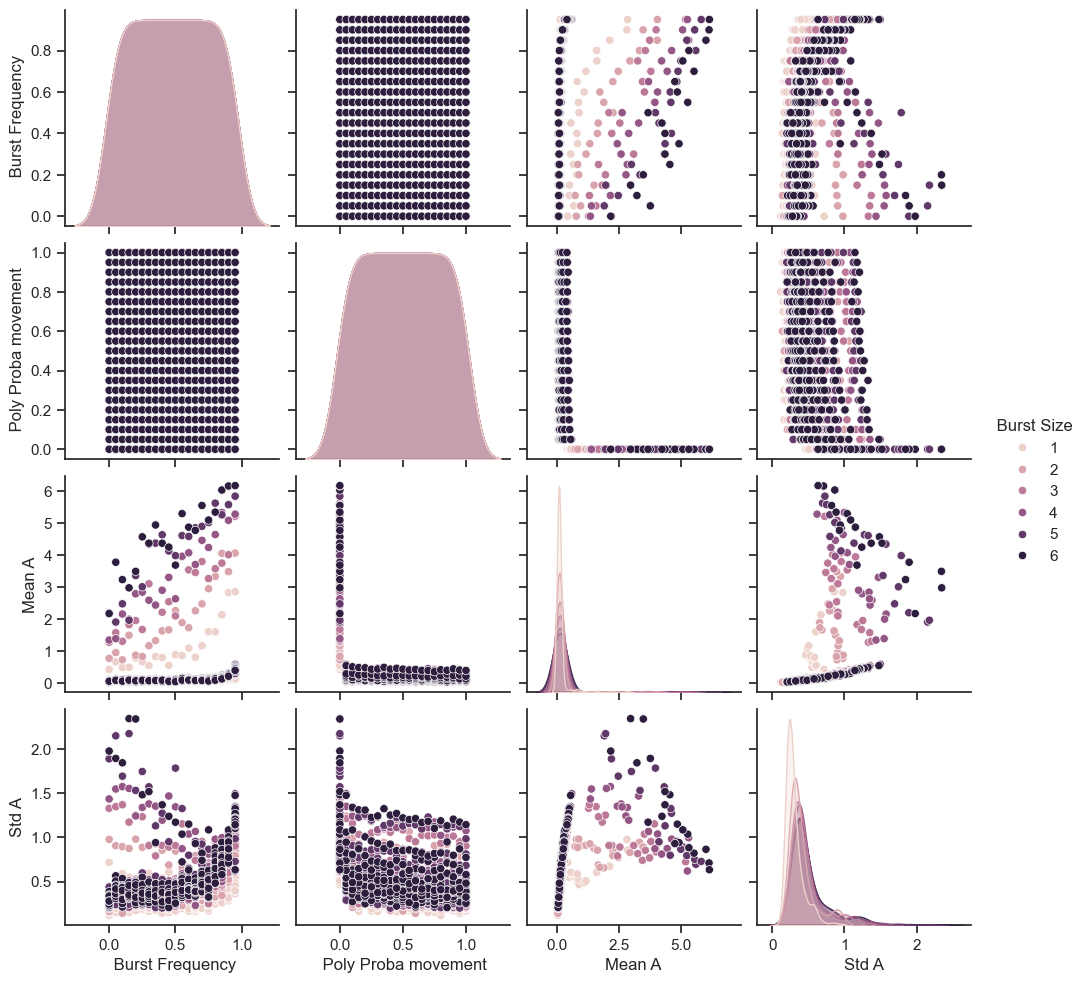

In [9]:
sns.pairplot(newdf, hue = ' Burst Size')

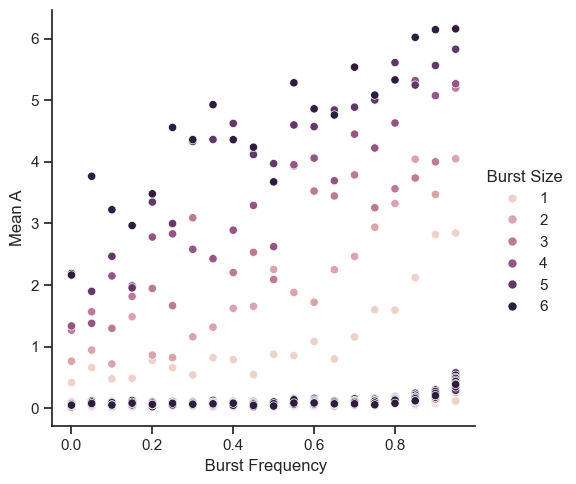

In [13]:
sns.relplot(data = newdf, x =' Burst Frequency', y = 'Mean A', hue = ' Burst Size')

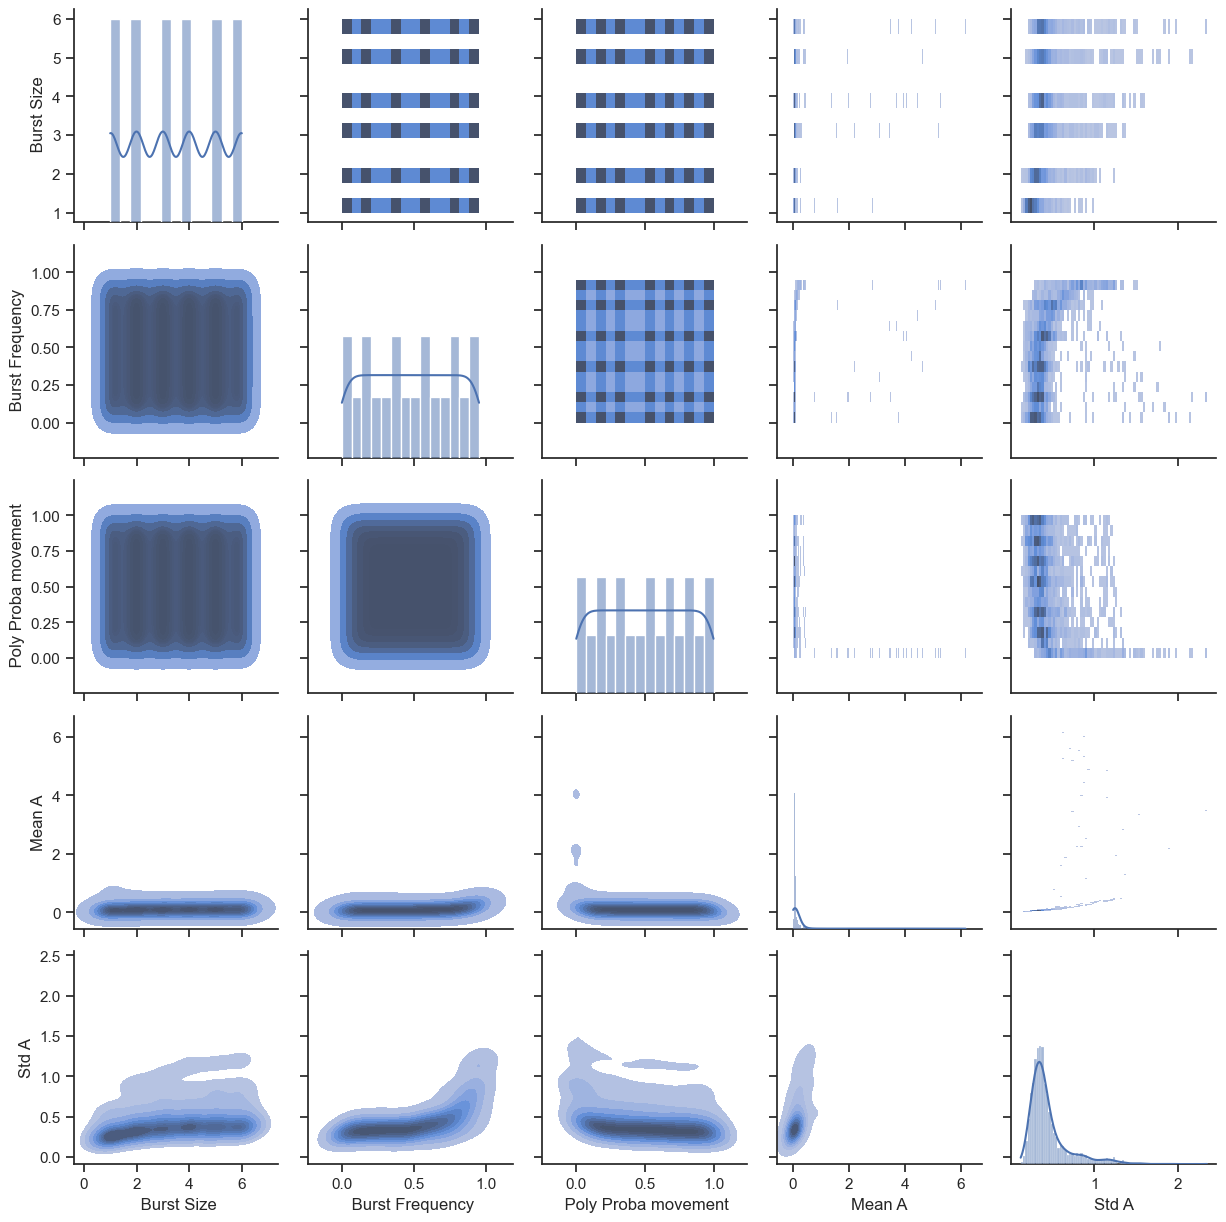

In [14]:
g = sns.PairGrid(newdf)
g.map_upper(sns.histplot)
g.map_diag(sns.histplot, kde = True)
g.map_lower(sns.kdeplot, fill = True)